# Trip Advisor Hotel Reviews
### 20k hotel reviews extracted from Tripadvisor.

## Important lLibraries

In [1]:
import pandas as pd
import numpy as np
import re
import itertools
import time
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.corpus import stopwords
import contractions
import string 
from nltk.stem import LancasterStemmer
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from collections import Counter

#### Let's read the data

In [2]:
df = pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


### Data Cleaning

In [4]:
df.shape

(20491, 2)

In [5]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


#### So as we can see it's cleaned data and we will start to Exploratory Data Analysis 

### Exploratory Data Analysis

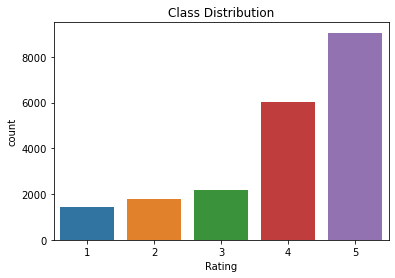

In [8]:
#Now, we will take a look at the variable “Rating” to see if majority of the customer ratings are positive or negative.
sns.countplot(x= df['Rating'])
plt.title('Class Distribution')
plt.show()

From Above Distribution we can find out that count of high rating hotels are more as compared to low rating hotels.

## NLP Preprocessing

#### Contractions
* is capable of resolving contractions (and slang)
##### example:  i’m    ---> I am

In [9]:
df['Review']=df['Review'].apply(lambda x: contractions.fix(x))

#### Cleaning the Text

In [10]:
X = df['Review']
y = df['Rating']

def data_cleaner(review):
    
    
    # remove digits
    review = re.sub(r'\d+',' ', review)
   
    
    #removing stop words
    review = review.split()
    review = " ".join([word for word in review if not word in stop_words])
    
    #removing duplicate letters in words
    review = re.sub(r'(.)\1+', r'\1\1', review)  
    #review = re.sub(r'(.)\1+', r'\1', review)
    
    #Removing all special characters and numericals leaving the alphabets

    review = re.sub('[^A-Za-z]+', ' ', review)
    
    #Remove Extraspace
    review=re.sub(' +',' ',review)
    
    #Remove punctuations
    review=re.sub('[%s]' % re.escape(string.punctuation), '',review)
    
    # Fuction to clean the text data * symbols *change to lower_case
    review = review.lower()
    review = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", review) 
    
    # mathes any whitespace 
    review = re.sub(r'\s+',' ', review)
    
    # remove HTML tag/markups
    review = re.compile('<.*?>').sub(' ', review)
    
    return review

ps = PorterStemmer() 
stop_words = stopwords.words('english')

df['Review'] = X.apply(data_cleaner)


In [11]:
#Removing numbers
df["Review"] = df["Review"].replace('\w*\d\w*', '', regex=True)

##### Remove words with three letters or less

In [12]:
df['Review']=df['Review'].str.replace(r'\b(\w{1,3})\b', '')

<ipython-input-12-b27af299581b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Review']=df['Review'].str.replace(r'\b(\w{1,3})\b', '')


In [13]:
df.head()

,Review,Rating
0,nice hotel expensive parking good deal stay h...,4
1,nothing special charge diamond member hilton ...,2
2,nice rooms experience hotel monaco seattle goo...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


###  Normalization
* Stemming: A process of removing and replacing suffixes to get to the root form of the word, which is called stem.
* Lemmatization: returns the base or dictionary form of a word.

#### Stemming

In [14]:
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])


In [15]:
df["Review"] = df["Review"].apply(lambda text: stem_words(text))
df.head()

,Review,Rating
0,nice hotel expens park good deal stay hotel an...,4
1,noth special charg diamond member hilton decid...,2
2,nice room experi hotel monaco seattl good hote...,3
3,uniqu great stay wonder time hotel monaco loca...,5
4,great stay great stay went seahawk game awesom...,5


#### Lemmitization

In [16]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [17]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])


In [18]:
df["Review"] = df["Review"].apply(lambda text: lemmatize_words(text))
df.head()

,Review,Rating
0,nice hotel expens park good deal stay hotel an...,4
1,noth special charg diamond member hilton decid...,2
2,nice room experi hotel monaco seattl good hote...,3
3,uniqu great stay wonder time hotel monaco loca...,5
4,great stay great stay go seahawk game awesom d...,5


#### Removing most frequent words

In [19]:
cnt = Counter()
txt = ['also', 'meanwhile','however', 'time','hour', 'soon', 'day', 'book','there', 'hotel','stayed', 'room', 'leave','arrive', 'stay', 'come','walk', 'check','ask', 'lot', 'thing', 'add', 'rarely','use', 'look', 'minute','bring', 'need', 'world','think', 'value','hope', 'include','night', 'people','look', 'need']

for txt in df['Review'].values:
    for word in txt.split():
        cnt[word]+=1


In [20]:
frequent_words = set([w for(w,wc) in cnt.most_common(3)])
def remover(txt):
    return " ".join([word for word in str(txt).split() if word not in frequent_words])

df['Review2'] = df['Review'].apply(lambda txt: remover(txt))
df.head()

,Review,Rating,Review2
0,nice hotel expens park good deal stay hotel an...,4,nice expens park good deal anniversari arriv l...
1,noth special charg diamond member hilton decid...,2,noth special charg diamond member hilton decid...
2,nice room experi hotel monaco seattl good hote...,3,nice experi monaco seattl good level posit lar...
3,uniqu great stay wonder time hotel monaco loca...,5,uniqu great wonder time monaco locat excel sho...
4,great stay great stay go seahawk game awesom d...,5,great great go seahawk game awesom downfal vie...


In [21]:
#saving the data
df.to_csv('Trip_Advisor_clean.csv')